In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

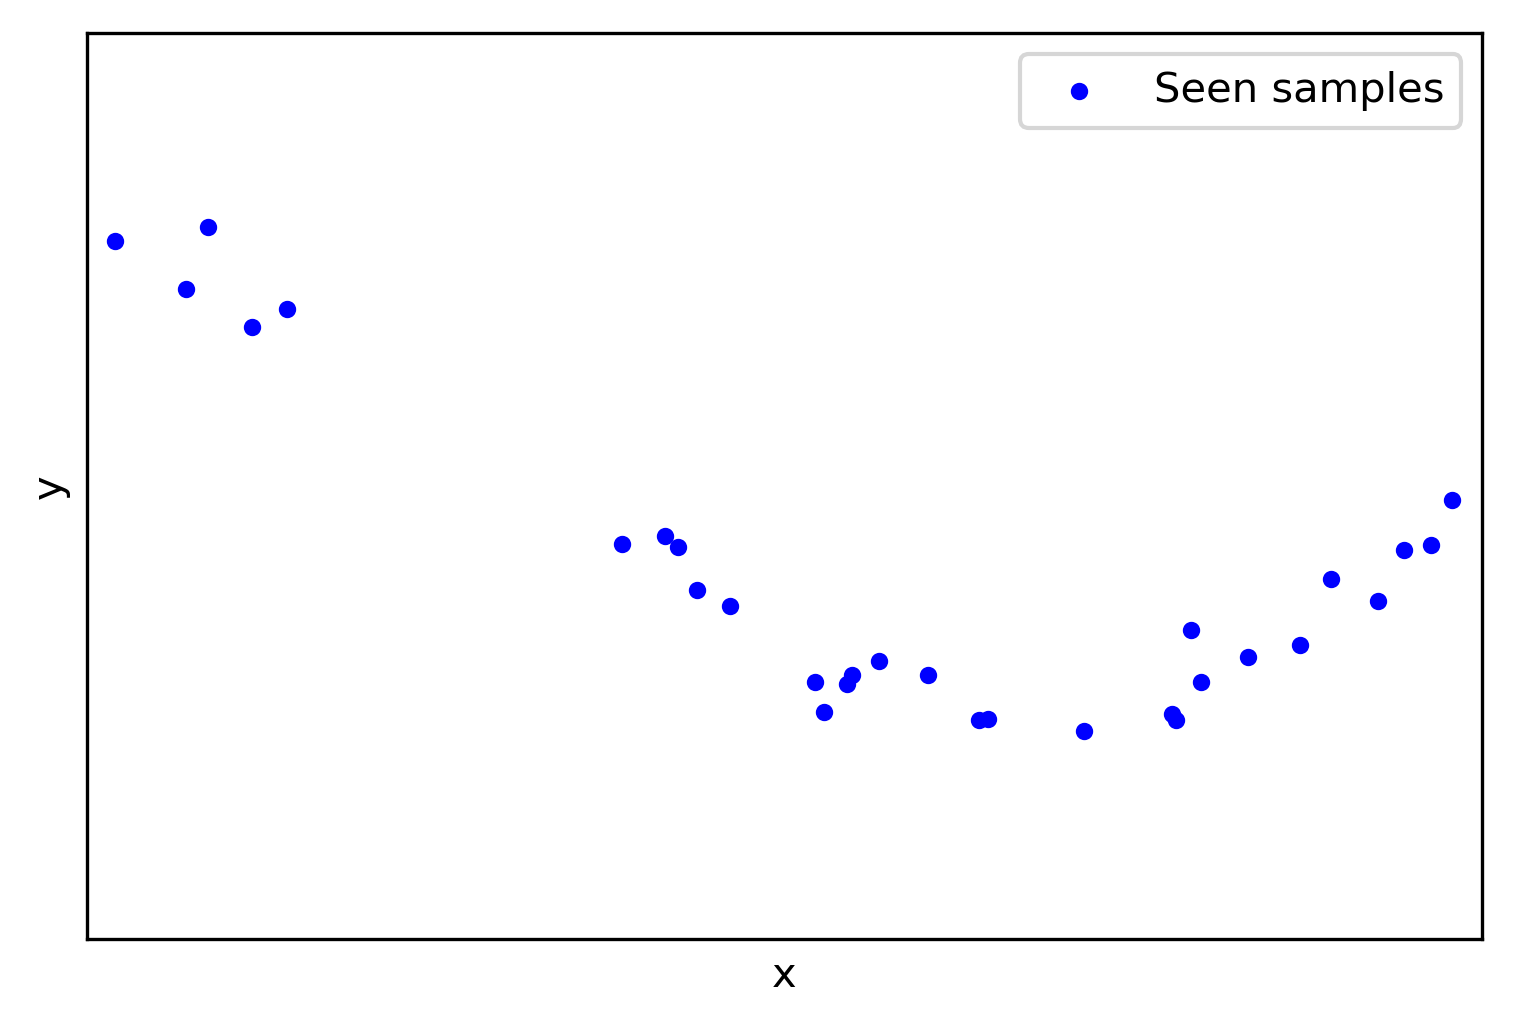

In [4]:
'''
Reference: 
http://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html
'''
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degree=15

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

X2 = np.sort(np.random.rand(n_samples))
y2 = true_fun(X2) + np.random.randn(n_samples) * 0.1

plt.figure(dpi=300)
ax = plt.subplot(1, 1, 1)
plt.setp(ax, xticks=(), yticks=())

polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
pipeline.fit(X[:, np.newaxis], y)

# Evaluate the models using crossvalidation
scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                         scoring="neg_mean_squared_error", cv=10)

X_test = np.linspace(0, 1, 100)
#plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
#plt.plot(X_test, true_fun(X_test), label="True function", color="red")
plt.scatter(X, y, color='b', s=10, label="Seen samples")
#plt.scatter(X2, y2, color='g', s=10, label="Unseen samples")

plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
#print (scores.mean())
#plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
    #degree, -scores.mean(), scores.std()))

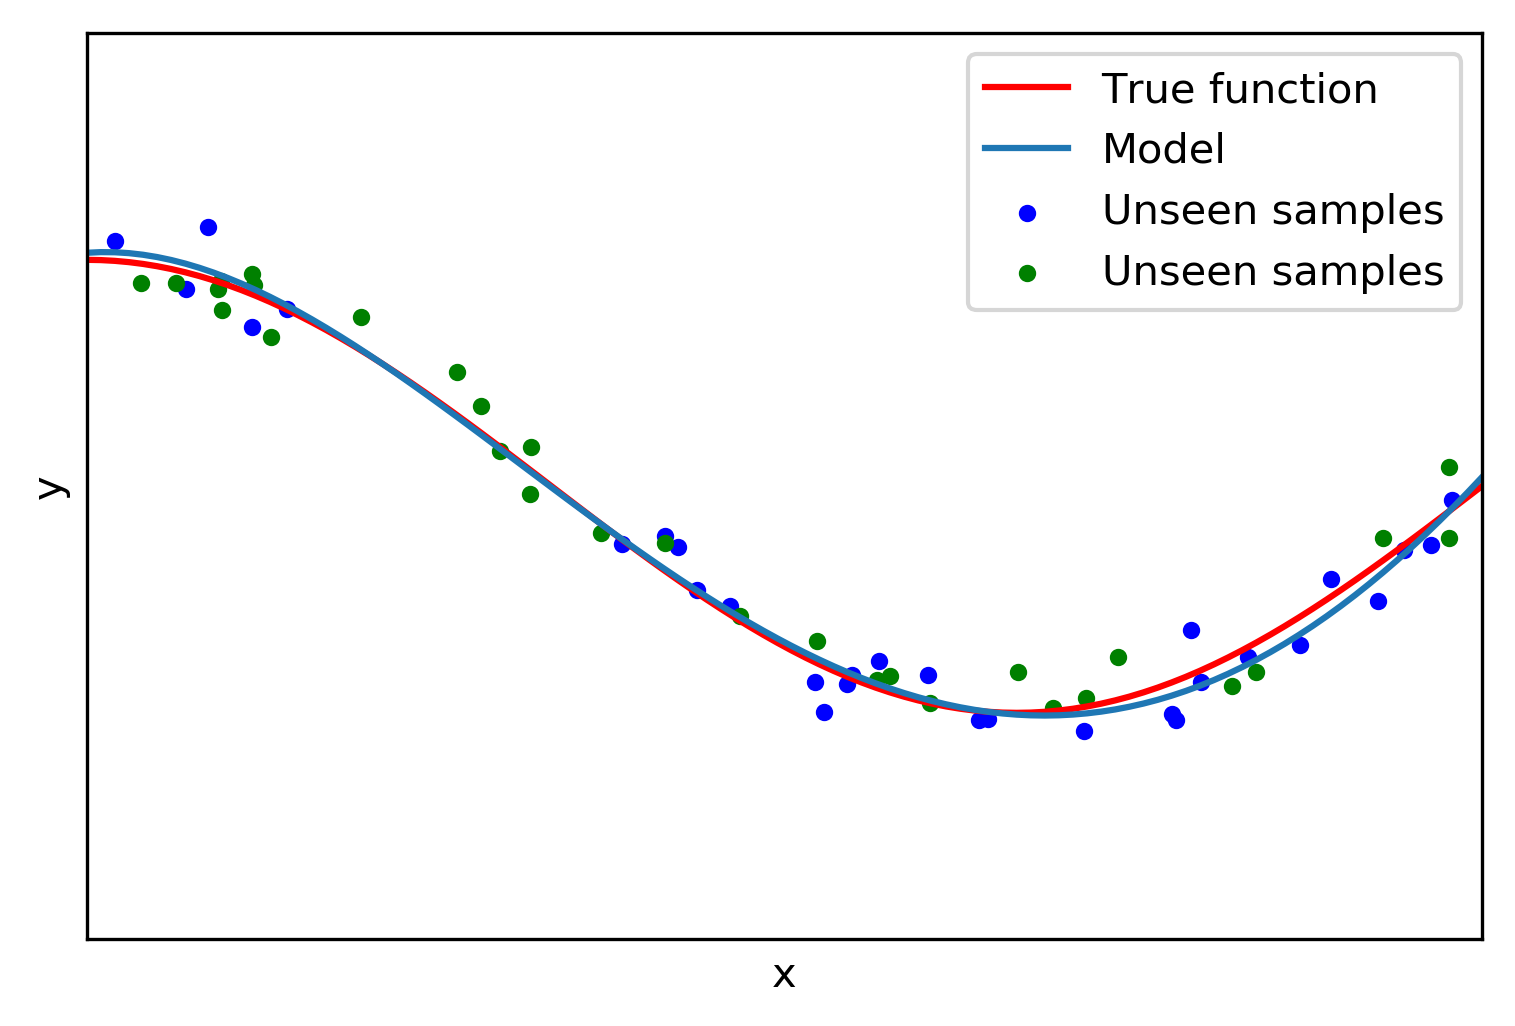

In [5]:
n_samples = 30
degree=4

plt.figure(dpi=300)
ax = plt.subplot(1, 1, 1)
plt.setp(ax, xticks=(), yticks=())

polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
pipeline.fit(X[:, np.newaxis], y)

# Evaluate the models using crossvalidation
scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                         scoring="neg_mean_squared_error", cv=10)

X_test = np.linspace(0, 1, 100)
plt.plot(X_test, true_fun(X_test), label="True function", color="red")
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
plt.scatter(X, y, color='b', s=10, label="Unseen samples")
plt.scatter(X2, y2, color='g', s=10, label="Unseen samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")

In [6]:
'''
# You may find following codes helpful
from sklearn.model_selection import cross_val_score

# This is how we constructed a polynomial model
polynomial_features = PolynomialFeatures(degree=i, include_bias=False)
pipeline = Pipeline([("polynomial_features", polynomial_features),
                        ("linear_regression", linear_regression)])
pipeline.fit(X[:, np.newaxis], y)

# use cross_val_score

# Please print the inverse of the mean of score
# e.g.,
# print (-score.mean())
'''

'\n# You may find following codes helpful\nfrom sklearn.model_selection import cross_val_score\n\n# This is how we constructed a polynomial model\npolynomial_features = PolynomialFeatures(degree=i, include_bias=False)\npipeline = Pipeline([("polynomial_features", polynomial_features),\n                        ("linear_regression", linear_regression)])\npipeline.fit(X[:, np.newaxis], y)\n\n# Please print the inverse of the mean of score\n# e.g.,\n# print (-score.mean())\n'